# Portfolio choice problem

Consider a portfolio choice problem where an investor chooses the fraction $\alpha$ to invest in a risky asset in order to maximise expected utility,
$$
\max_{\alpha \in [0, 1]} E_t\left[u(W_{t+1})\right]
$$
Assume that the investor consumes all of next-period's wealth $W_{t+1}$ which is given by
$$
W_{t+1} = R_{t+1} \alpha W_t + R_f (1-\alpha) W_t
$$
where $W_t$ is the initial investable wealth in period $t$, $R_{t+1}$ is the gross return on the risky investment and $R_f$ is the risk-free return on the fraction of the portfolio which is invested a risk-free asset (e.g., a bank deposit).
The utility function $u(\bullet)$ has a constant relative risk aversion (CRRA) form and is given by
$$
u(W) = \begin{cases}
\frac{W^{1-\gamma}}{1-\gamma} & \text{if } \gamma \neq 1 \\
\log(W) & \text{if } \gamma = 1
\end{cases}
$$
where $\gamma$ is a parameter governing the investor's risk aversion (higher values of $\gamma$ imply that the investor is more averse to taking risk).

For simplicity, let the gross risk-free return be $R_f = 1$.
Finally, assume that the risky return can take on two realisations, high and low, with equal probability,
$$
R_{t+1} = \begin{cases}
1 + \mu + \epsilon & \text{with probability } \frac{1}{2} \\
1 + \mu - \epsilon & \text{with probability } \frac{1}{2} \\
\end{cases}
$$
where $\mu > 0$ is the risk premium and $\epsilon > 0$ parametrises the volatility of risky returns.

# Expected utility function

Write a Python function that takes as arguments the risky share $\alpha$, the initial wealth $W_t$, and the parameters $\mu$, $\epsilon$ and $\gamma$, and returns the expected utility associated with the given values.
Your function signature should look like this:

In [1]:
def expected_util(alpha, W, mu, epsilon, gamma):
    # Compute the associated expected utility
    # eu = ...
    return eu

Make sure that your function works correctly for both $\gamma = 1$ and $\gamma \neq 1$. Moreover, the function should allow for the arguments $\alpha$ and $W$ to be passed as both scalar values as well as NumPy arrays!

#### Solution

In order to evaluate the expected utility, we compute next-period wealth for the cases of both low and high risky return realisations, evaluate the corresponding utility, and compute the weighted mean. Note that we only need to distinguish between log utility and general CRRA in the second step.

In [2]:
import numpy as np

def expected_util(alpha, W, mu, epsilon, gamma):
    # Risk-free return
    Rf = 1.0

    # Low risky return next period
    W_lo = ((1.0 + mu - epsilon) * alpha + Rf * (1.0 - alpha)) * W

    # High risky return next period
    W_hi = ((1.0 + mu + epsilon) * alpha + Rf * (1.0 - alpha)) * W

    if gamma == 1:
        # Log case 
        u_lo = np.log(W_lo)
        u_hi = np.log(W_hi)
    else:
        # General CRRA case for gamma != 1
        u_lo = W_lo**(1.0 - gamma) / (1.0 - gamma)
        u_hi = W_hi**(1.0 - gamma) / (1.0 - gamma)

    # Expected utility: weighted mean of low and high realisations
    eu = 0.5 * u_lo + 0.5 * u_hi

    return eu

# Plot expected utility against the risky share

Use the function you wrote above to plot expected utility for 100 values of $\alpha$ on the unit interval $[0, 1]$. Assume the following values for the remaining parameters:

In [3]:
import numpy as np

W = 1.0             # Initial wealth
gamma = 2.0         # Relative risk aversion
mu = 0.04           # Risk premium
epsilon = 0.2       # Standard deviation of risky return

# List of risky shares (alpha) for which to plot expected utility
alpha = np.linspace(0.0, 1.0, 100)

Label both axes and add a legend to your plot.

#### Solution

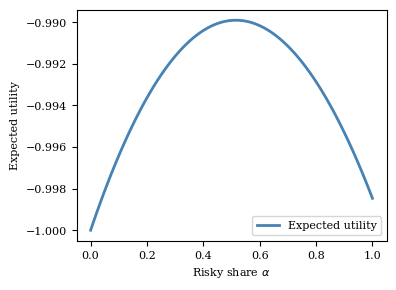

In [4]:
import matplotlib.pyplot as plt

Eu = expected_util(alpha, W, mu, epsilon, gamma)
plt.plot(alpha, Eu, c='steelblue', lw=2.0, label='Expected utility')
plt.xlabel(r'Risky share $\alpha$')
plt.ylabel('Expected utility')
plt.legend()

# Optimal risky share

In the above section, you plotted expected utility for all possible risky shares. As a next step, you are asked to compute the *optimal* risky share for a given set of parameters and initial wealth $W_t$.

You can find the optimal $\alpha$ numerically using one of the minimiser function included in SciPy's [optimization package](https://docs.scipy.org/doc/scipy/reference/optimize.html). Specifically, for this task you should use the function
[`minimize_scalar()`](https://docs.scipy.org/doc/scipy/reference/optimize.minimize_scalar-bounded.html) with the argument `method='bounded'` since the risky share is a scalar variable which is bounded between $[0,1]$.
Use the `expected_util()` function from the previous question as the minimiser's objective. 

The following code illustrates how to set up the minimisation for a specific set of parameters:

In [5]:
from scipy.optimize import minimize_scalar

W = 1.0             # Initial wealth
gamma = 2.0         # Relative risk aversion
mu = 0.04           # Risk premium
epsilon = 0.2       # Standard deviation of risky return

# Compute optimal risky share for given parameters
result = minimize_scalar(
    # SciPy minimiser passes a single argument (alpha), which we plug into 
    # expected_util() together with any other parameters.
    lambda alpha: - expected_util(alpha, W, mu, epsilon, gamma),
    method='bounded',
    bounds=[0, 1]
)

# Print optimal risky share
print(f'Optimal risky share: {result.x}')

Optimal risky share: 0.5155169286613541


The following comments should help you understand what the above code does:

- SciPy's routines all perform _minimisation_, whereas we need to _maximise_ expected utility. We get around this problem by using a lambda expression and returning _negative_ expected utility.
- The `expected_util()` function you wrote requires several arguments, SciPy's `minimize_scalar()`, however, expects a function that takes only a single argument. We can again get around this using the lambda expression as shown above.
- The maximisation result is returned as an [`OptimizeResult`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.OptimizeResult.html#scipy.optimize.OptimizeResult) object. The only thing you need to know about this object is that the optimal value is stored in the attribute `x` and can be retrieved as illustrated above.

## Optimal risky share by wealth

Consider a set of initial wealth levels $W_t$ uniformly spread over the interval $[1, 10]$,

In [6]:
W = np.linspace(1.0, 10.0, 100)

Write a loop that computes the optimal risky share for each of these wealth levels, using the same values for the remaining parameters as above:

In [7]:
gamma = 2.0         # Relative risk aversion
mu = 0.04           # Risk premium
epsilon = 0.2       # Standard deviation of risky return

Plot the optimal risky share against initial wealth. Set the plot range to the interval $[0,1.1]$ using `plt.ylim((0.0, 1.1))` to clearly see the results. How does the optimal risky share depend on initial wealth?

#### Solution

To compute the optimal risky share for each wealth level, all we need to do is to wrap the above code in a loop and store each result in an array.

In [8]:
import numpy as np
from scipy.optimize import minimize_scalar

gamma = 2.0         # Relative risk aversion
mu = 0.04           # Risk premium
epsilon = 0.2       # Standard deviation of risky return

# Wealth levels for which to compute risky share
W = np.linspace(1.0, 10.0, 100)

# Array to store optimal risky shares for each wealth level
alphas = np.empty_like(W)

for i, Wi in enumerate(W):
    result = minimize_scalar(
        lambda alpha: - expected_util(alpha, Wi, mu, epsilon, gamma),
        method='bounded',
        bounds=[0, 1]
    )

    # Store optimal risky share for current wealth level
    alphas[i] = result.x

The following code plots the optimal risky share. As the graph shows, $\alpha$ is independent of initial wealth in this case, which is a consequence of CRRA utility.

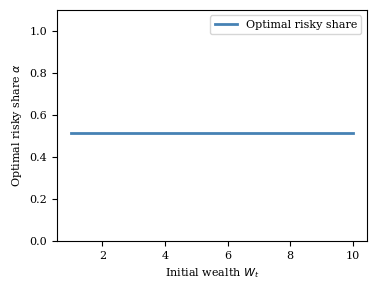

In [9]:
import matplotlib.pyplot as plt

plt.plot(W, alphas, c='steelblue', lw=2.0, label='Optimal risky share')
plt.xlabel('Initial wealth $W_t$')
plt.ylabel(r'Optimal risky share $\alpha$')
plt.ylim((0.0, 1.1))
plt.legend()

## Optimal risky share by relative risk aversion (RRA)

Now consider a set of RRA parameters $\gamma$ uniformly spread over the interval $[1, 5]$,

In [10]:
gammas = np.linspace(1.0, 5.0, 100)

Write a loop that computes the optimal risky share for each $\gamma$, using the following values for initial wealth and the remaining parameters:

In [11]:
W = 1.0             # Initial wealth
mu = 0.04           # Risk premium
epsilon = 0.2       # Standard deviation of risky return

Plot the optimal risky share as a function of these RRA values. How does the optimal risky share depend on risk aversion $\gamma$?

#### Solution

To solve this problem, we only need to slightly adapt the code from the previous question to loop over $\gamma$ instead of initial wealth. The rest remains unchanged.

In [12]:
import numpy as np
from scipy.optimize import minimize_scalar

W = 1.0             # Initial wealth
mu = 0.04           # Risk premium
epsilon = 0.2       # Standard deviation of risky return

# RRA parameters
gammas = np.linspace(1.0, 5.0, 100)

# Array to store optimal risky shares for each RRA value
alphas = np.empty_like(gammas)

for i, gamma in enumerate(gammas):
    result = minimize_scalar(
        lambda alpha: - expected_util(alpha, W, mu, epsilon, gamma),
        method='bounded',
        bounds=[0, 1]
    )

    # Store optimal risky share for current wealth level
    alphas[i] = result.x

When plotting the optimal risky share against $\gamma$, we see that it is decreasing in risk aversion. This makes intuitive sense, as more risk investors optimally choose to allocate a smaller fraction of their wealth into risky assets.

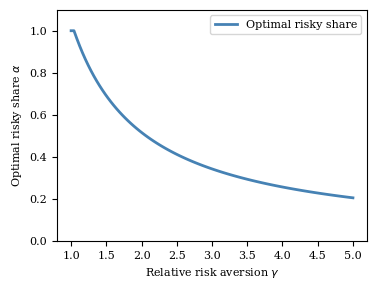

In [13]:
import matplotlib.pyplot as plt

plt.plot(gammas, alphas, c='steelblue', lw=2.0, label='Optimal risky share')
plt.xlabel(r'Relative risk aversion $\gamma$')
plt.ylabel(r'Optimal risky share $\alpha$')
plt.ylim((0.0, 1.1))
plt.legend()